In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

## 1.내재변동성
## 2. 변동성 Trend
## 3. 주식변동성 Trend
## 4. 변동성의 성향이 어떤가?

In [27]:
df2 = yf.download("VXX")['Adj Close'].to_frame()

[*********************100%***********************]  1 of 1 completed


In [22]:
df = yf.download("^VIX")['Adj Close'].to_frame()

[*********************100%***********************]  1 of 1 completed


In [23]:
df2 = yf.download("^GSPC")['Adj Close'].to_frame()
df2 = df2.loc[df.index[0]:]

[*********************100%***********************]  1 of 1 completed


In [24]:
df = df[df.index.isin(df2.index)]

In [26]:
len(df)==len(df2)

True

In [79]:
iv = []
n = 20
vol_20 = df2.pct_change().rolling(5).std()*np.sqrt(252)
vol_20_rol = vol_20.rolling(20).mean()

avg_5 = df.rolling(5).mean()
avg_20 = df.rolling(20).mean()
DITV = pd.Series(np.where(avg_5['Adj Close'] >= avg_20['Adj Close'],1,-1), index = df.index)
IVT = DITV.rolling(10).sum()

Position = pd.Series(index = df.index).fillna(0)

for bar in range(n+1,len(df)):
    RV = vol_20.iloc[bar,0]
    if RV>0.45:
        if IVT.iloc[bar] != 10:
            Position.iloc[bar] = 0.25
            continue
        else:
            Position.iloc[bar] = 0.4
            continue
    elif RV>=0.35:
        if IVT.iloc[bar]==-10:
            Position.iloc[bar] = 0.4
            continue
        elif IVT.iloc[bar] != 10:
            Position.iloc[bar] = 0.25
            continue
    elif RV>0.20:
        if IVT.iloc[bar]==-10:
            Position.iloc[bar] = 0.25
            continue

C:\Users\seongsh\AppData\Local\Temp\ipykernel_8332\2993041123.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Position = pd.Series(index = df.index).fillna(0)


In [76]:
iv = []
n = 20
vol_20 = df2.pct_change().rolling(5).std()*np.sqrt(252)
vol_20_rol = vol_20.rolling(20).mean()

avg_5 = df.rolling(5).mean()
avg_20 = df.rolling(20).mean()
DITV = pd.Series(np.where(avg_5['Adj Close'] >= avg_20['Adj Close'],1,-1), index = df.index)
IVT = DITV.rolling(10).sum()

Position = pd.Series(index = df.index).fillna(0)

for bar in range(n+1,len(df)):
    RV = vol_20.iloc[bar,0]
    rol_RV = vol_20_rol.iloc[bar,0]
    if RV>rol_RV*1.5:
        if IVT.iloc[bar]==-10:
            Position.iloc[bar] = 0.4
            continue
#         elif IVT.iloc[bar]<=-8:
#             Position.iloc[bar] = 0.25
#             continue
    elif RV>rol_RV:
        if IVT.iloc[bar]==-10:
            Position.iloc[bar] = 0.4
            continue
        elif IVT.iloc[bar]<=-8:
            Position.iloc[bar] = 0.2
            continue

C:\Users\seongsh\AppData\Local\Temp\ipykernel_8332\3649397108.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Position = pd.Series(index = df.index).fillna(0)


In [83]:
Position

Date
1990-01-02    0.0
1990-01-03    0.0
1990-01-04    0.0
1990-01-05    0.0
1990-01-08    0.0
             ... 
2023-05-10    0.0
2023-05-11    0.0
2023-05-12    0.0
2023-05-15    0.0
2023-05-16    0.0
Length: 8407, dtype: float64

In [112]:
aa = pd.DataFrame(np.array(df.pct_change())*np.array(Position.shift(1)).reshape(-1,1))

In [114]:
aa[aa!=0].dropna().mean()
#aa[aa!=0].dropna().std()

0   -0.000448
dtype: float64

In [176]:
rol_sum[rol_sum==4].dropna().index

DatetimeIndex(['1990-03-22', '1990-10-24', '1990-10-25', '1990-10-26',
               '1991-08-27', '1991-12-30', '1992-01-28', '1992-03-04',
               '1992-04-02', '1992-11-10',
               ...
               '2019-12-02', '2020-10-01', '2020-10-02', '2021-02-08',
               '2021-02-09', '2021-08-17', '2021-08-18', '2021-09-28',
               '2022-08-09', '2022-09-13'],
              dtype='datetime64[ns]', name='Date', length=109, freq=None)

In [181]:
df.loc[rol_sum[rol_sum==4].dropna().index].head(20)

,Adj Close
Date,
1990-03-22,22.740000
1990-10-24,28.280001
1990-10-25,29.040001
1990-10-26,30.750000
1991-08-27,15.460000
1991-12-30,17.629999
1992-01-28,17.670000
1992-03-04,17.889999
1992-04-02,17.059999


In [182]:
rol_sum = pd.DataFrame(np.where(df.diff().diff()>0,1,-1),index=df.index).rolling(3).sum()

df.loc[rol_sum[rol_sum==3].dropna().index]

,Adj Close
Date,
1990-03-21,20.100000
1990-03-22,22.740000
1990-04-27,22.190001
1990-05-08,18.490000
1990-06-28,16.180000
...,...
2022-09-12,23.870001
2022-09-13,27.270000
2022-10-06,30.520000


In [191]:
rol_sum[rol_sum==3].dropna().index.shift(freq=pd.offsets.BDay())

DatetimeIndex(['1990-03-22', '1990-03-23', '1990-04-30', '1990-05-09',
               '1990-06-29', '1990-07-30', '1990-09-17', '1990-10-18',
               '1990-10-24', '1990-10-25',
               ...
               '2022-05-19', '2022-07-27', '2022-08-09', '2022-08-10',
               '2022-09-07', '2022-09-13', '2022-09-14', '2022-10-07',
               '2022-11-29', '2023-05-03'],
              dtype='datetime64[ns]', name='Date', length=449, freq=None)

In [193]:
next_dates = rol_sum[rol_sum == 3].dropna().index.shift(freq=pd.DateOffset(days=1))

## 이게 가능해?

In [201]:
rol_sum.iloc[bar,0]

1.0

In [280]:
df2

,Adj Close
Date,
1990-01-02,359.690002
1990-01-03,358.760010
1990-01-04,355.670013
1990-01-05,352.200012
1990-01-08,353.790009
...,...
2023-05-10,4137.640137
2023-05-11,4130.620117
2023-05-12,4124.080078


In [308]:
n = 10
rol_sum = pd.DataFrame(np.where(df.diff().diff()<0,1,-1),index=df.index).rolling(n).sum()


In [321]:
np.log(df).diff(3).shift(-3)

,Adj Close
Date,
1990-01-02,0.153985
1990-01-03,0.107776
1990-01-04,0.144141
1990-01-05,0.109628
1990-01-08,-0.010419
...,...
2023-05-10,0.010570
2023-05-11,0.060729
2023-05-12,NaN


<Axes: xlabel='Date'>

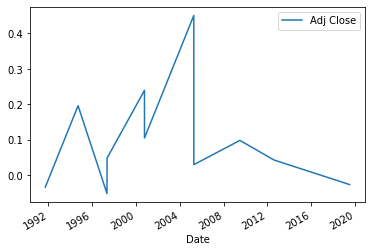

In [336]:
np.log(df).diff(3).shift(-3).loc[rol_sum[rol_sum>=6].dropna().index].plot()

In [352]:
n = 6
rol_sum = pd.DataFrame(np.where(df.diff().diff()<0,1,-1),index=df.index).rolling(n).sum()

Position = pd.Series(index = df.index).fillna(0)

for bar in range(n+1,len(df)):
    trend = rol_sum.iloc[bar,0]
    if trend >=4:
        Position.iloc[bar] = 0.4
        continue

C:\Users\seongsh\AppData\Local\Temp\ipykernel_8332\2392991160.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Position = pd.Series(index = df.index).fillna(0)


In [303]:
n = 5
rol_sum = pd.DataFrame(np.where(df.diff().diff()>0,1,-1),index=df.index).rolling(n).sum()

Position = pd.Series(index = df.index).fillna(0)

for bar in range(n+1,len(df)):
    trend = rol_sum.iloc[bar,0]
    if trend >=4:
        Position.iloc[bar] = 0.4
        continue

C:\Users\seongsh\AppData\Local\Temp\ipykernel_8332\1972274900.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Position = pd.Series(index = df.index).fillna(0)


In [353]:
Position = Position.shift()

<Axes: xlabel='Date'>

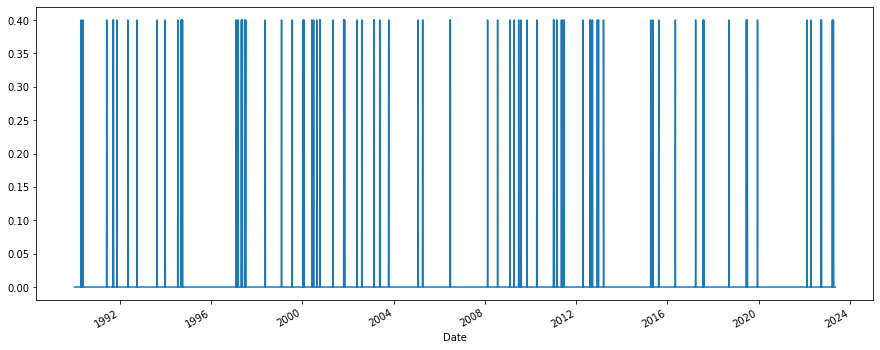

In [354]:
Position.plot(figsize=(15,6))

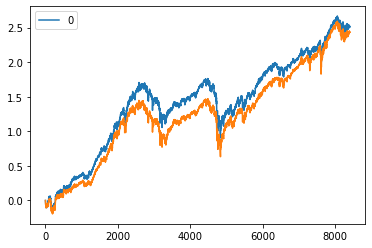

In [356]:
pd.DataFrame((np.array(np.log(df2).diff())*np.array(1-Position).reshape(-1,1)+np.array(np.log(df).diff())*np.array(Position).reshape(-1,1))).cumsum().plot()
plt.plot(np.array(np.log(df2).diff().cumsum()))

In [266]:
np.array(df2.pct_change())*np.array(1-Position).reshape(-1,1)

array([[        nan],
       [-0.00258554],
       [-0.00861299],
       ...,
       [-0.00158331],
       [ 0.00295816],
       [-0.00637768]])

<Axes: >

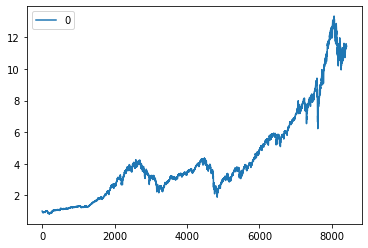

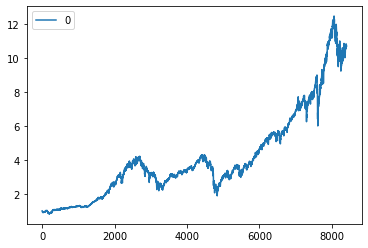

In [209]:
pd.DataFrame(np.array(df2.pct_change())+1).cumprod().plot()
pd.DataFrame(np.array(df2.pct_change())*np.array(1-Position).reshape(-1,1)+1).cumprod().plot()

<Axes: xlabel='Date'>

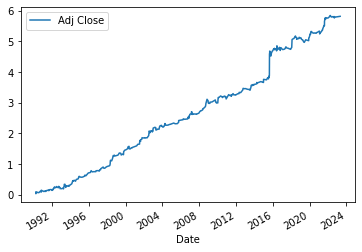

In [210]:
np.log(df).diff().shift(1).loc[rol_sum[rol_sum==3].dropna().index].cumsum().plot()

<Axes: xlabel='Date'>

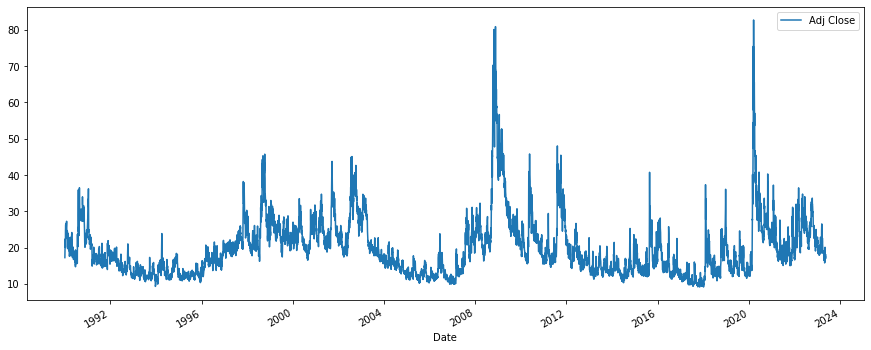

In [116]:
df.plot(figsize=(15,6))

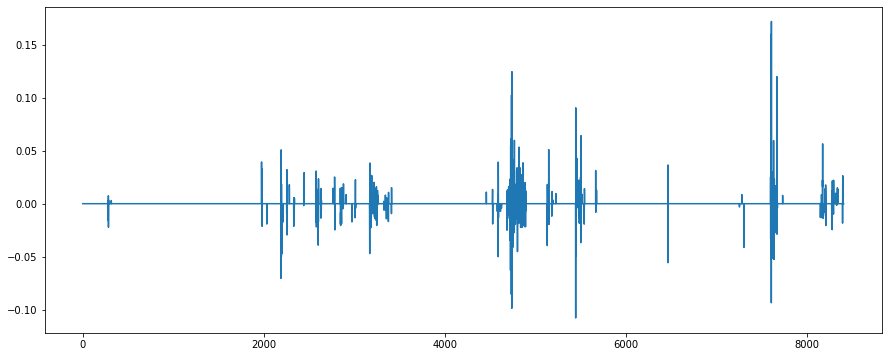

In [111]:
plt.figure(figsize=(15,6))
plt.plot(np.array(df.pct_change())*np.array(Position.shift(1)).reshape(-1,1))

In [103]:
df[np.log(df).diff().rolling(3).sum()>0.1].dropna().index

,Adj Close
Date,
1990-01-05,20.110001
1990-01-08,20.260000
1990-01-09,22.200001
1990-01-10,22.440001
1990-01-12,24.639999
...,...
2023-03-10,24.799999
2023-03-13,26.520000
2023-04-26,18.840000


<Axes: >

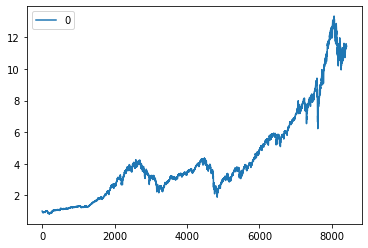

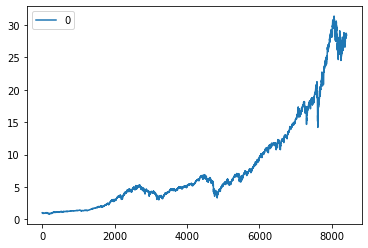

In [205]:
pd.DataFrame(np.array(df2.pct_change())+1).cumprod().plot()
pd.DataFrame(np.array(df2.pct_change())*np.array(1-Position).reshape(-1,1)+1).cumprod().plot()

In [254]:
iv = []
n = 20
vol_20 = df2.pct_change().rolling(5).std()*np.sqrt(252)
avg_5 = df.rolling(5).mean()
DITV = pd.Series(np.where(avg_5['Adj Close'] < df['Adj Close'],1,-1), index = df.index)
IVT = DITV.rolling(10).sum()
Position = pd.Series(index = df.index).fillna(0)

for bar in range(n+1,len(df)):
    RV = vol_20.iloc[bar,0]
    if (RV>0.20) & (RV<0.35):
        if IVT.iloc[bar]==-10:
            Position.iloc[bar] = 0.25
            continue
    elif (RV>=0.35) & (RV<=0.45):
        if IVT.iloc[bar]== -10:
            Position.iloc[bar] = 0.4
            continue
        elif IVT.iloc[bar]!= 10:
            Position.iloc[bar] = 0.25
            continue
    elif (RV>0.45):
        if IVT.iloc[bar]!= 10:
            Position.iloc[bar] = 0.4
            continue
    
        
        

C:\Users\seongsh\AppData\Local\Temp\ipykernel_15812\3458356370.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Position = pd.Series(index = df.index).fillna(0)


<Axes: >

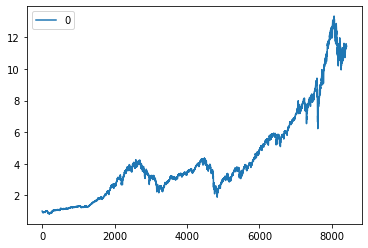

In [18]:
pd.DataFrame(np.array(df2.pct_change())+1).cumprod().plot()

<Axes: >

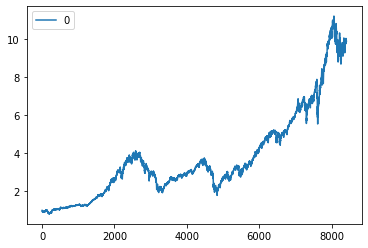

In [19]:
pd.DataFrame(np.array(df2.pct_change())*np.array(1-Position).reshape(-1,1)+1).cumprod().plot()

In [20]:
pd.DataFrame((np.array(df2.pct_change())*np.array(1-Position).reshape(-1,1)+1)* (np.array(df.pct_change())*np.array(Position).reshape(-1,1)+1)).cumprod()

,0
0,NaN
1,0.997414
2,0.988824
3,0.979177
4,0.983597
...,...
8402,5.490657
8403,5.481342
8404,5.472663
8405,5.488852


In [276]:
(np.array(df.pct_change())*np.array(Position).reshape(-1,1)+1)

array([[nan],
       [ 1.],
       [ 1.],
       ...,
       [ 1.],
       [ 1.],
       [ 1.]])

In [292]:
fuck = (pd.DataFrame(np.array(df.pct_change())*np.array(Position).reshape(-1,1),index =df.index).fillna(0))

In [305]:
vol_20.loc["2020-3"]

,Adj Close
Date,
2020-03-02,0.546592
2020-03-03,0.541226
2020-03-04,0.649548
2020-03-05,0.606808
2020-03-06,0.620706
2020-03-09,0.675226
2020-03-10,0.839404
2020-03-11,0.746472
2020-03-12,0.901408


In [301]:
fuck.resample('M').sum().sort_values(0,ascending=False).head(20)

,0
Date,
2020-03-31,0.235541
1997-10-31,0.191122
2008-10-31,0.122750
2020-06-30,0.116118
2011-08-31,0.109129
2008-09-30,0.096085
2022-05-31,0.068883
2007-08-31,0.058625
1998-08-31,0.047273


In [172]:
np.array(Position)

array([0., 0., 0., ..., 0., 0., 0.])

In [89]:
np.log(df).diff().rolling(3).sum().shift(-3)

,Adj Close
Date,
1990-01-02,0.153985
1990-01-03,0.107776
1990-01-04,0.144141
1990-01-05,0.109628
1990-01-08,-0.010419
...,...
2023-05-08,-0.002949
2023-05-09,-0.039153
2023-05-10,NaN


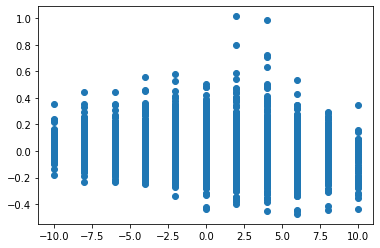

In [96]:
m=3
plt.scatter(IVT,np.log(df).diff().rolling(m).sum().shift(-m))

In [108]:
total = pd.concat([IVT, df,np.log(df).diff().rolling(3).sum().shift(-3)], axis=1)

In [109]:
total.columns = ['IVT','Price','ret_3']

In [126]:
total['Price']<15

Date
1990-01-02    False
1990-01-03    False
1990-01-04    False
1990-01-05    False
1990-01-08    False
              ...  
2023-05-08    False
2023-05-09    False
2023-05-10    False
2023-05-11    False
2023-05-12    False
Name: Price, Length: 8406, dtype: bool

In [127]:
t=[]
for bar in range(len(total)):
    if total['Price'].iloc[bar]<15:
        t.append(0)
    elif total['Price'].iloc[bar]<20:
        t.append(1)
    elif total['Price'].iloc[bar]<25:
        t.append(2)
    elif total['Price'].iloc[bar]<30:
        t.append(3)
    elif total['Price'].iloc[bar]<35:
        t.append(4)
    elif total['Price'].iloc[bar]<40:
        t.append(5)
    else:
        t.append(6)

In [129]:
total['price2'] = t

In [134]:
aa =total.groupby(["IVT",'price2'])['ret_3'].mean()

In [139]:
pd.set_option('display.max_rows', None)

In [151]:
pd.reset_option('display.max_rows')

In [152]:
total.groupby(["IVT",'price2'])['ret_3']

In [153]:
total

,IVT,Price,ret_3,price2
Date,,,,
1990-01-02,NaN,17.240000,0.153985,1
1990-01-03,NaN,18.190001,0.107776,1
1990-01-04,NaN,19.219999,0.144141,1
1990-01-05,NaN,20.110001,0.109628,2
1990-01-08,NaN,20.260000,-0.010419,2
...,...,...,...,...
2023-05-08,0.0,16.980000,-0.002949,1
2023-05-09,-2.0,17.709999,-0.039153,1
2023-05-10,-4.0,16.940001,NaN,1


In [149]:
total[total['ret_3'] >= 0].groupby(["IVT", 'price2'])['ret_3'].count()/total.groupby(["IVT", 'price2'])['ret_3'].count()

IVT    price2
-10.0  0         0.678571
       1         0.428571
       2         0.645161
       3         0.454545
       4         0.750000
       5         1.000000
       6         0.400000
-8.0   0         0.640351
       1         0.568000
       2         0.589041
       3         0.454545
       4         0.400000
       5              NaN
       6         0.062500
-6.0   0         0.588608
       1         0.550000
       2         0.451128
       3         0.551020
       4         0.428571
       5              NaN
       6         0.416667
-4.0   0         0.617021
       1         0.558824
       2         0.447876
       3         0.428571
       4         0.527778
       5         0.333333
       6         0.400000
-2.0   0         0.541667
       1         0.515766
       2         0.485623
       3         0.373239
       4         0.318182
       5         0.250000
       6         0.324324
 0.0   0         0.501818
       1         0.454545
       2         0.45079

In [142]:
plt.scatter(aa)

TypeError: scatter() missing 1 required positional argument: 'y'

In [121]:
total.groupby("IVT")['Price','ret_3'].median()

C:\Users\seongsh\AppData\Local\Temp\ipykernel_15812\1267535859.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total.groupby("IVT")['Price','ret_3'].median()


,Price,ret_3
IVT,,
-10.0,18.155000,0.013897
-8.0,16.995000,0.017659
-6.0,15.980000,0.006723
-4.0,17.175000,0.007905
-2.0,17.485000,-0.003081
0.0,17.360001,-0.006195
2.0,18.610001,-0.011209
4.0,19.340000,-0.025112
6.0,20.635000,-0.036146


In [117]:
total

,IVT,Price,ret_3
Date,,,
1990-01-02,NaN,17.240000,0.153985
1990-01-03,NaN,18.190001,0.107776
1990-01-04,NaN,19.219999,0.144141
1990-01-05,NaN,20.110001,0.109628
1990-01-08,NaN,20.260000,-0.010419
...,...,...,...
2023-05-08,0.0,16.980000,-0.002949
2023-05-09,-2.0,17.709999,-0.039153
2023-05-10,-4.0,16.940001,NaN


In [75]:
plt.scatter(IVT,np.log(df).diff().rolling(3).sum().shift(-3))

,Adj Close
Date,
1990-01-02,NaN
1990-01-03,0.055104
1990-01-04,0.056624
1990-01-05,0.046306
1990-01-08,0.007459
...,...
2023-05-08,-0.012216
2023-05-09,0.042992
2023-05-10,-0.043478
